## Detecting Outliers

### 1. Using the Standard Deviation 68-95-99.7 Rule
Using Standard Deviation and the 68-95-99.7 rule; Basically stating that for a normal distribution 99.7% of the data falls into the third standard deviation!(any data outside of the third standard deviation is considered an outlier!)

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot
import seaborn as sns
import random
random.seed(3)

In [2]:
#defining functions to calculate mean, variance and standard deviation from scratch
def mean(data):
  n = len(data)
  mean = sum(data) / n
  return mean
 
def variance(data):
  n = len(data)
  mean = sum(data) / n
  deviations = [(x - mean) ** 2 for x in data]
  variance = sum(deviations) / n
  return variance
 
def stdev(data):
  var = variance(data)
  std_dev = math.sqrt(var)
  return std_dev

In [3]:
#defining a function to detect outliers
def findOutliers(data):
    outliers=[]
    #defining the data's std, mean and the cut off threshold
    data_mean = mean(data)
    data_std = stdev(data)
    cut_off = data_std * 3
    
    #defining the upper and lower limits
    upper_limit = data_mean + cut_off
    lower_limit = data_mean - cut_off
    
    #detecting outliers
    for outlier in data:
        if outlier < lower_limit or outlier > upper_limit:
            outliers.append(outlier)
    return (outliers)

In [4]:
#Generating random data to test the function
data = np.random.randn(30000)*30+30 #multiplying and adding random numbers to get real values

outliers = pd.DataFrame(findOutliers(data))

In [5]:
#sample of outliers
outliers.head()

,0
0,-82.986928
1,142.769064
2,124.324469
3,135.430428
4,124.759698


### 2. Using Boxplot and Visualization
We can use visualization and boxplots to detect the outliers!This method can be used for the multi-dimensional datasets as well! Each boxplot consist of an Inter Quartile Range (IQR) which is basically all the data that fall into the 1st to 3rd quartile (Q3 - Q1). So we can use the IQR and define the upper and lower whiskers of the boxplot; which are (Q3 + 1.5 x IQR) and (Q1- 1.5 x IQR). Any data that's outside of the upper and lower boundaries are considered an outlier!

C:\Users\nesha\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

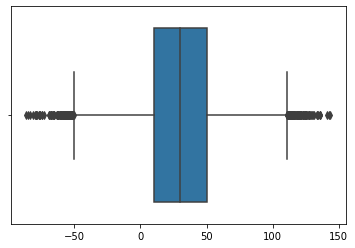

In [6]:
#boxplot
sns.boxplot(data)

In [7]:
#defining a function to calculate the IQR and detect outliers
def boxplotOutliers(data):
    boxplot_outliers = []
    #defining Q1, Q3 and IQR using the np.percentile 
    Q1 = np.percentile(data, 25, interpolation = 'midpoint')
    Q3= np.percentile(data, 75, interpolation = 'midpoint')
    IQR= Q3 - Q1
    
    #defining the upper and lower whiskers
    lower_whisker = Q1 - 1.5*IQR
    upper_whisker = Q3 - 1.5*IQR
    
    for outlier in data:
        if outlier < lower_whisker or outlier > upper_whisker:
            boxplot_outliers.append(outlier)
    return boxplot_outliers

In [8]:
#sample of boxplot outliers
boxplot_outlier = pd.DataFrame(boxplotOutliers(data))
boxplot_outlier.head()

,0
0,59.451044
1,31.189493
2,33.493434
3,69.127691
4,19.178368


### 3. Using DBSCAN
DBSCAN is shorten for Density-based Spatial Clustering Applications with Noise! In a nutshell, DBSCAN is a clustering method which can be used to detect noise and anomalies in the dataset! This method can be used for both single and multi-dimensional problems.
The challenging part of DBSCAN method is that it has hyperparameters that should be picked wisely!! (Aren't they all?!)
Here are a quick review of some of the important DBSCAN hyperparameters and definitions:
- min_samples (hyperparameter) which is the minimum number of core data points needed to form a cluster!
- eps (hyperparameter) which is the maximum distant allowed between points in the same cluster! Meaning if a data-point has a distance higher than eps with any other points, it wont be consirdered as part of that cluster!
- Border points which the name says it all! These are the data points on the border of the cluster (so still part of the cluster!)
- Noise points which don't belong to any cluster! These are the data points we would like to detect here!! Scikit-learn library labels noisy points as (-1).

In [10]:
from sklearn.cluster import DBSCAN 
random.seed(2)

#creating two dimensional random data
random_dimensional_data = np.random.randn(60000,2) * 20 + 20


In [12]:
dbscan = DBSCAN(min_samples = 4, eps=3)
cluster = dbscan.fit_predict(random_dimensional_data)

list(cluster).count(-1)

163

Seems like there's been 163 noisy points in the random data!

### 4. Using Isolation Forest
Isolation Forest is an unsupervised learning algorithm. Thus, it is different from the methods mentioned above! Unlike the ones previously mentioned, there's no need for defining cores and clusters! Isolation Forest is based on an assumption that anomalies in data (the outliers) are the minority and it defines them based on their different attributes! This is a very accurate method to be used specially for high dimensional datasets!

In [14]:
from sklearn.ensemble import IsolationForest
random.seed(3)

random_dimensional_data = np.random.randn(60000,2)  * 30 + 30

isolationforest = IsolationForest(max_samples=100, random_state = 3, contamination= 'auto')
predictions = isolationforest.fit_predict(random_dimensional_data)
predictions

array([-1, -1,  1, ...,  1, -1,  1])

The output of this algorithm is an array consist of 1 and -1; where 1 means not an outlier, and -1 is an outlier!

In [15]:
list(predictions).count(-1)

18502

#### Hope you enjoyed this notebook!
### Cheers!